In [1]:
import matplotlib.pyplot as plt
import numpy as np

from typing import List, Tuple
from matplotlib.animation import FuncAnimation

import ipywidgets as widgets
from ipywidgets import HBox, VBox
from IPython.display import display
from IPython.display import Audio

from scipy.io.wavfile import read

%matplotlib notebook
%matplotlib inline

In [2]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
from speedypanther.synthesis.wave_generation import sample_sinewave, sample_complex_wave, generate_impulse_train, generate_noise, generate_timesteps
from speedypanther.analysis.fourier import fourier_analysis

## Plot a simple waveform

In [4]:
def plot_waveform(timesteps: np.ndarray, samples: np.ndarray):
    plt.plot(timesteps, samples)

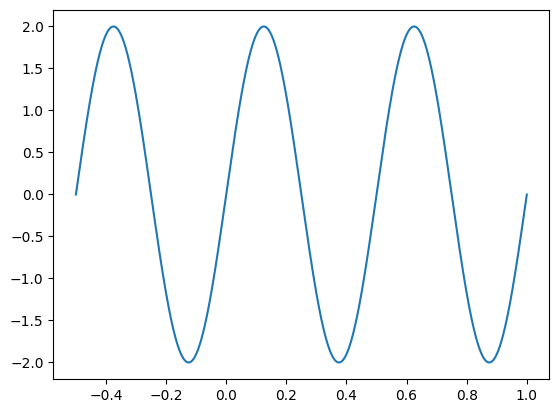

In [5]:
timesteps, samples = sample_sinewave(2, start_time = -0.5, end_time=1.0, amplitude=2)
plot_waveform(timesteps, samples)

In [6]:
@widgets.interact_manual(
    freq=(0, 100), amplitude=(0.0, 50.0), color=['blue', 'red', 'green'], lw=(1., 10.))
def plot_waveform_interactive(freq=1., amplitude=1.0, color='blue', lw=1, grid=True):
    timesteps, samples = sample_sinewave(freq, start_time = 0.0, end_time=1.0, amplitude=amplitude)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    ax.plot(timesteps, samples,
            lw=lw, color=color)
    ax.grid(grid)

interactive(children=(IntSlider(value=1, description='freq'), FloatSlider(value=1.0, description='amplitude', …

## Plot a complex waveform

In [7]:
complex_timesteps, complex_samples = sample_complex_wave(frequencies=[1, 5, 20], coeffs=[0.3, 0.2, 0.4])

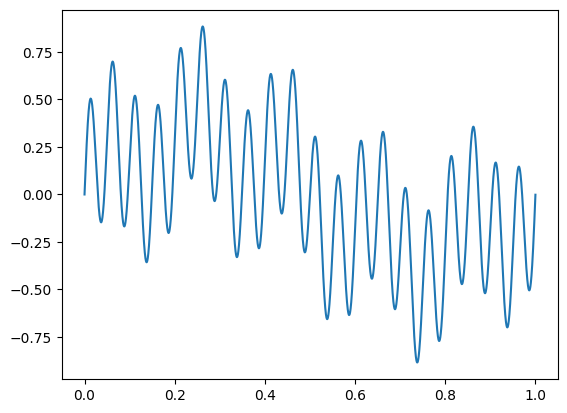

In [8]:
plot_waveform(complex_timesteps, complex_samples)

In [9]:
@widgets.interact_manual(
    freq1=(0, 100),
    freq2=(0, 100),
    freq3=(0, 100),
    coeff1=(0.0, 1.0),
    coeff2=(0.0, 1.0),
    coeff3=(0.0, 1.0))
def plot_complex_waveform_interactive(freq1=1, freq2=1, freq3=1, coeff1=0.33, coeff2=0.33, coeff3=0.33, grid=True):
    """
    Currently supports 3 waveforms mixed together.
    """
    freqs = [freq1, freq2, freq3]
    coeffs = [coeff1, coeff2, coeff3]
    timesteps, samples = sample_complex_wave(freqs, coeffs)
    
    fig, ax = plt.subplots(1, 1, figsize=(4, 3))
    plt.ylim([-1.05, 1.05])
    ax.plot(timesteps, samples)
    ax.grid(grid)

interactive(children=(IntSlider(value=1, description='freq1'), IntSlider(value=1, description='freq2'), IntSli…

In [10]:
def plot_impulse_train(timesteps: np.ndarray, samples: np.ndarray):
    amplitude = samples.max()
    plt.ylim([-amplitude - amplitude * 0.1, amplitude + amplitude * 0.1])
    plt.scatter(timesteps, samples)

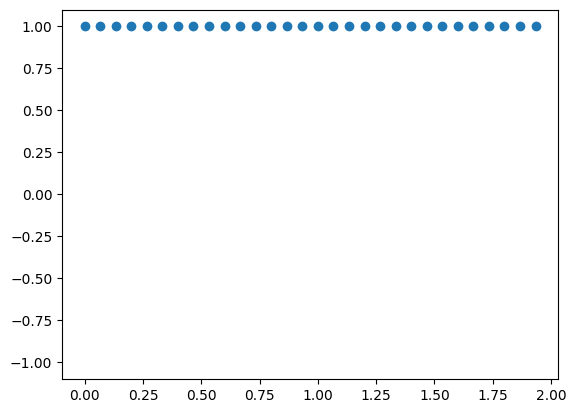

In [11]:
train_timesteps, train_samples = generate_impulse_train(15, end_time=2.0)
plot_impulse_train(train_timesteps, train_samples)

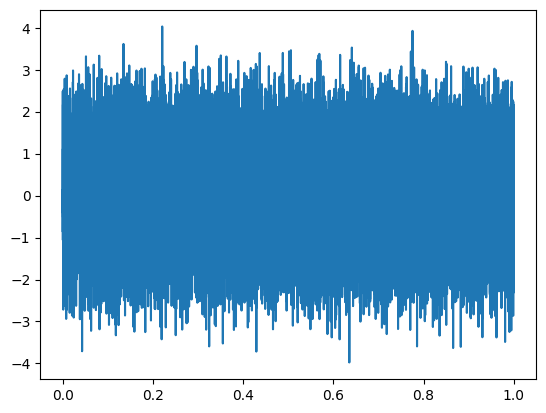

In [12]:
noise_timesteps, noise_samples = generate_noise()
plot_waveform(noise_timesteps, noise_samples)

## Fourier Analysis

In [13]:
# Create a new complex wave to play around with.
_, complex_wave = sample_complex_wave(frequencies=[600, 800, 1000, 1600], coeffs=[0.3, 0.2, 0.4, 0.1], end_time=0.1)

duration = 0.005
sample_rate = 44_100
# Take a window of samples out of the complex wave.
sample_window = complex_wave[:int(duration * sample_rate)]

# Turn the time representation of the wave into a frequency representation.
freq_bins, freq_ampls = fourier_analysis(sample_window, duration, sample_rate)

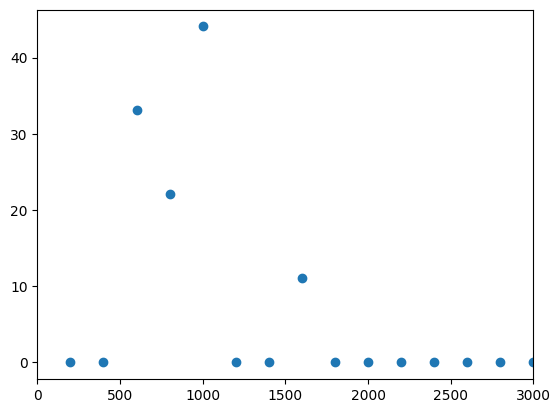

In [14]:
plt.xlim(0, 3000)
plt.scatter(freq_bins, freq_ampls)

## Read a real soundfile 

In [15]:
coo_file = "../data/single_words/vowels/Monophthongs/11-coo.wav"
coo_sr, coo = read(coo_file)
coo_arr = np.array(coo, dtype=float)

# Only take the first channel for now.
coo_arr = coo_arr[:, 0]

# Generate timesteps to be able to plot the wave.
coo_timesteps = generate_timesteps(coo_arr)

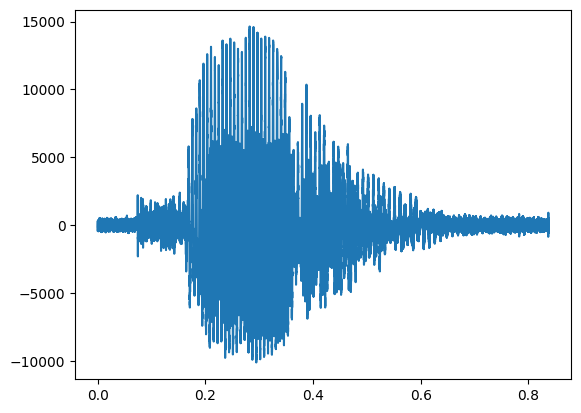

In [16]:
plot_waveform(coo_timesteps, coo_arr)

## Plot Frequency Representations for short analsysis windows

In [17]:
# Take the first window of 5 milliseconds and apply Fourier Analysis to it.
audio_length = coo_arr.shape[0] / sample_rate
samples_per_window = int(sample_rate * 0.005)
first_window = coo_arr[:samples_per_window]

first_freq_bins, first_freq_ampls = fourier_analysis(first_window)

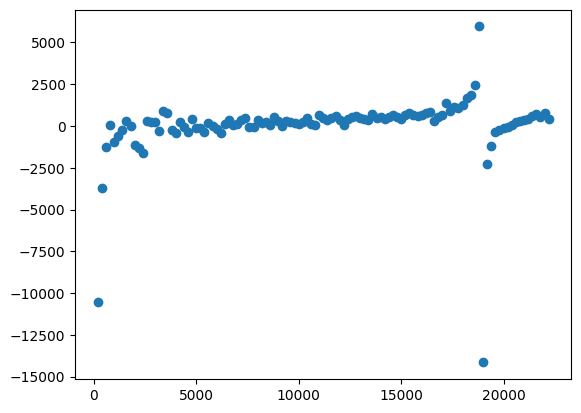

In [19]:
plt.scatter(first_freq_bins, first_freq_ampls)

In [20]:
# Plot for a window that is inside the /u/ sound.
start = 40 * samples_per_window
end = start + samples_per_window
u_window = first_window = coo_arr[start:end]

u_freq_bins, u_freq_ampls = fourier_analysis(u_window)

In [22]:
# Function to normalize the values in a numpy array.
normalize = lambda x: (x-np.min(x))/(np.max(x)-np.min(x))

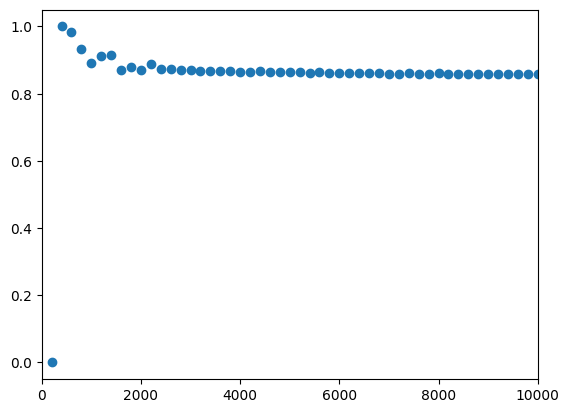

In [23]:
plt.xlim(0, 10000)
norm_u_ampls = normalize(u_freq_ampls)
plt.scatter(u_freq_bins, norm_u_ampls)

## Play audios to inspect the analyzed sounds

In [26]:
print("A single frame from the /u/ sound.")
Audio(u_freq_ampls, rate=sample_rate)

A single frame from the /u/ sound.


In [27]:
start = 40 * samples_per_window
length = 60
end = start + (length * samples_per_window)
part = first_window = coo_arr[start:end]

print("A longer window (20 * window_size) from the /u/ sound.")
Audio(part, rate=sample_rate)

A longer window (20 * window_size) from the /u/ sound.
